In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

In [18]:
# Constants
hbar = 1  # Reduced Planck's constant
m = 1     # Mass of the particle
L = 10    # Length of the spatial domain
N = 500   # Number of spatial points
dx = L / N  # Spatial step
x = np.linspace(0, L, N)  # Spatial grid

# Potential: A barrier at the center of the domain
V = np.zeros(N)
barrier_width = 2
barrier_height = 50
barrier_start = int(N / 2 - barrier_width / dx / 2)
barrier_end = int(N / 2 + barrier_width / dx / 2)
V[barrier_start:barrier_end] = barrier_height

# Initial wavefunction: A Gaussian wave packet
x0 = L / 4  # Initial position
sigma = 0.5  # Width of the wave packet
k0 = 5      # Initial momentum
psi_real = np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.cos(k0 * x)
psi_imag = np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.sin(k0 * x)
psi = psi_real + 1j * psi_imag  # Complex wavefunction
psi /= np.sqrt(np.sum(np.abs(psi)**2) * dx)  # Normalize

# Time evolution parameters
dt = 0.001  # Time step
timesteps = 200  # Number of time steps

# Coefficients for the finite difference method
alpha = 1j * hbar * dt / (2 * m * dx**2)
beta = 1j * dt / hbar

# Construct the Hamiltonian matrix
H = np.zeros((N, N), dtype=complex)
for i in range(1, N - 1):
    H[i, i - 1] = H[i, i + 1] = alpha
    H[i, i] = -2 * alpha + beta * V[i]

# Time evolution operator (Crank-Nicolson method)
I = np.eye(N, dtype=complex)
A = I - H / 2
B = I + H / 2

# Precompute the LU decomposition for efficient solving
from scipy.linalg import lu_factor, lu_solve
lu, piv = lu_factor(A)


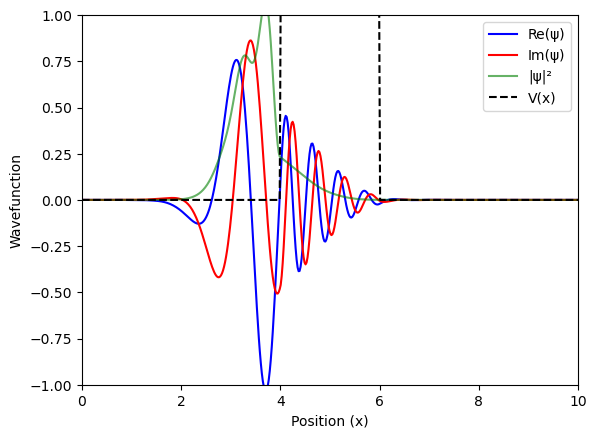

In [ ]:

# Initializing figure for animation
fig, ax = plt.subplots()
line_real, = ax.plot(x, np.real(psi), label="Re(ψ)", color='blue')
line_imag, = ax.plot(x, np.imag(psi), label="Im(ψ)", color='red')
line_prob, = ax.plot(x, np.abs(psi)**2, label="|ψ|²", color='green', alpha=0.6)
ax.plot(x, V / barrier_height * max(np.abs(psi)**2), label="V(x)", color='black', linestyle='--')
ax.legend()
ax.set_xlim(0, L)
ax.set_ylim(-1, 1)
ax.set_xlabel("Position (x)")
ax.set_ylabel("Wavefunction")

# Update function for animation
def update(frame):
    global psi
    b = np.dot(B, psi)
    psi = lu_solve((lu, piv), b)
    line_real.set_ydata(np.real(psi))
    line_imag.set_ydata(np.imag(psi))
    line_prob.set_ydata(np.abs(psi)**2)
    return line_real, line_imag, line_prob

# Create and save animation
ani = FuncAnimation(fig, update, frames=timesteps, interval=30, blit=True)
writer = PillowWriter(fps=30)
ani.save("quantum_barrier_simulation.gif", writer=writer)